In [82]:
%matplotlib inline

In [83]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression

from utils import effectiveDimension, factorize, gram, hiddenTargets


In [84]:
def genPt(r):
    angle = random.random() * 2 * 3.14159
    offset = np.random.randn() * 0.4
    x = (r + offset) * math.cos(angle)
    y = (r + offset) * math.sin(angle)
    return (x,y)

def genPts(r, n):
    ret = []
    for i in range(n):
        ret.append(genPt(r))
        
    return ret

In [85]:
pluses = genPts(5,200)
minuses = genPts(20,200)
X = np.array([[x1, x2] for (x1, x2) in pluses] + [[x1, x2] for (x1, x2) in minuses])
y = np.array([1] * len(pluses) + [-1] * len(minuses))

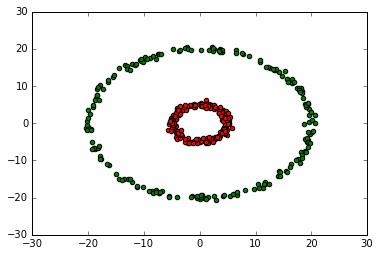

In [86]:
plt.scatter([x for (x,_) in pluses], [y for (_,y) in pluses], c='r')
plt.scatter([x for (x,_) in minuses], [y for (_,y) in minuses], c='g')

In [87]:
model = LogisticRegression(C=1)
model.fit(X, y)
print(model.score(X, y))

0.5175


In [117]:
from time import time
import os
from os.path import isdir, join
from glob import fnmatch

def filePrefix(alpha):
    '''x is a float.'''
    s = '{0:.12f}'.format(alpha)
    prefix = s.replace('.', '_')
    return 'alpha_' + (prefix if len(prefix) == 3 else prefix + '0') + '_'


def createSaveDirectory():
    '''Creates a unique directory in data/ based on timestamp.'''
    directoryName = str(int(time()))
    path = join('data', directoryName)
    !mkdir $path
    assert isdir(path), 'Directory does not exist\n{0}'.format(path)
    return path

    
def save(arr, alpha, path, which): 
    '''
    arr: The numpy array to save.
    alpha: The alpha associated with this calculation. See above definition.
    path: the directory to store the data.
    which: either "eigvals" or "H".
    
    returns an iterator of stored eigvals or H.
    '''
    fname = join(path, filePrefix(alpha) + which)
    np.save(fname, arr)
    print('Saved: ' + fname)
  

def load(path, which):
    '''
    path: the directory of the data.
    which: either "eigvals" or "H".
    
    returns an iterator of stored eigvals or H.
    '''
    fnames = fnmatch.filter(os.listdir(path), '*{0}*'.format(which))
    for fname in sorted(fnames):
        fullPath = join(path, fname)
        print('Loading: {0}'.format(fullPath))
        yield np.load(fullPath)

In [141]:
def computeHiddenTargets(alphas, X, y):
    XG = gram(X)
    YG = gram(y[:, np.newaxis])

    path = createSaveDirectory()
    print('Saving results in dir: ' + path)
    for alpha in alphas:
        H, eigvals = hiddenTargets(XG, YG, alpha)
        save(H, alpha, path, 'H')
        save(eigvals, alpha, path, 'eigvals')
        
    np.save(join(path, 'X'), X)
    np.save(join(path, 'y'), y)


alphas = np.arange(.98, 1, .001)
# alphas = np.arange(1e-5, 1e-3, 1e-5)

computeHiddenTargets(alphas, X, y)


Saving results in dir: data/1457403083
Saved: data/1457403083/alpha_0_9800000000000_H
Saved: data/1457403083/alpha_0_9800000000000_eigvals
Saved: data/1457403083/alpha_0_9810000000000_H
Saved: data/1457403083/alpha_0_9810000000000_eigvals
Saved: data/1457403083/alpha_0_9820000000000_H
Saved: data/1457403083/alpha_0_9820000000000_eigvals
Saved: data/1457403083/alpha_0_9830000000000_H
Saved: data/1457403083/alpha_0_9830000000000_eigvals
Saved: data/1457403083/alpha_0_9840000000000_H
Saved: data/1457403083/alpha_0_9840000000000_eigvals
Saved: data/1457403083/alpha_0_9850000000000_H
Saved: data/1457403083/alpha_0_9850000000000_eigvals
Saved: data/1457403083/alpha_0_9860000000000_H
Saved: data/1457403083/alpha_0_9860000000000_eigvals
Saved: data/1457403083/alpha_0_9870000000000_H
Saved: data/1457403083/alpha_0_9870000000000_eigvals
Saved: data/1457403083/alpha_0_9880000000000_H
Saved: data/1457403083/alpha_0_9880000000000_eigvals
Saved: data/1457403083/alpha_0_9890000000000_H
Saved: data/14

In [144]:
acc_train = []
for H in load('data/1457403083/', which='H'):
    print(H.shape)
    model = LogisticRegression(C=1)
    model.fit(H, y)
    print(model.coef_)
    acc_train.append(model.score(H, y))

Loading: data/1457403083/alpha_0_9800000000000_H.npy
(400, 3)
[[-0.12656156 -0.22180614 -4.50127346]]
Loading: data/1457403083/alpha_0_9810000000000_H.npy
(400, 3)
[[-0.13553486 -0.23747885 -4.49876412]]
Loading: data/1457403083/alpha_0_9820000000000_H.npy
(400, 3)
[[-0.14648507 -0.25650722 -4.49592292]]
Loading: data/1457403083/alpha_0_9830000000000_H.npy
(400, 3)
[[-0.16008408 -0.28023776 -4.4925975 ]]
Loading: data/1457403083/alpha_0_9840000000000_H.npy
(400, 3)
[[-0.17756454 -0.31070998 -4.48849332]]
Loading: data/1457403083/alpha_0_9850000000000_H.npy
(400, 3)
[[-0.2009634  -0.35142147 -4.4830606 ]]
Loading: data/1457403083/alpha_0_9860000000000_H.npy
(400, 3)
[[-0.23406195 -0.40880653 -4.47513728]]
Loading: data/1457403083/alpha_0_9870000000000_H.npy
(400, 3)
[[-0.28447486 -0.49592048 -4.46189536]]
Loading: data/1457403083/alpha_0_9880000000000_H.npy
(400, 3)
[[ 0.37230286 -0.64491269 -4.43491927]]
Loading: data/1457403083/alpha_0_9890000000000_H.npy
(400, 3)
[[-0.56109999 -0.951

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


(0, 0.5)

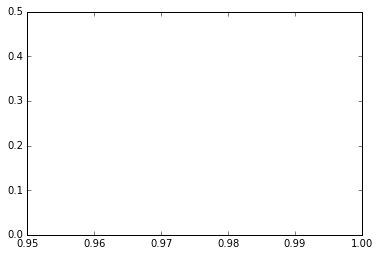

In [139]:
print(acc_train)
plt.plot(alphas, 1 - np.array(acc_train))
plt.ylim((0, 0.5))

Loading: data/1457403083/alpha_0_9800000000000_H.npy


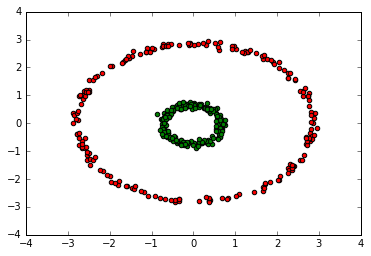

Loading: data/1457403083/alpha_0_9810000000000_H.npy


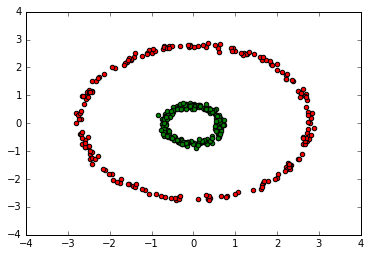

Loading: data/1457403083/alpha_0_9820000000000_H.npy


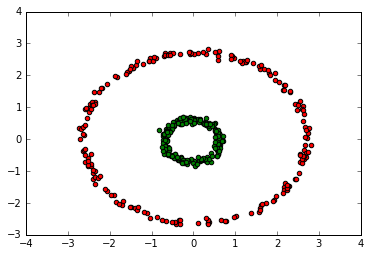

Loading: data/1457403083/alpha_0_9830000000000_H.npy


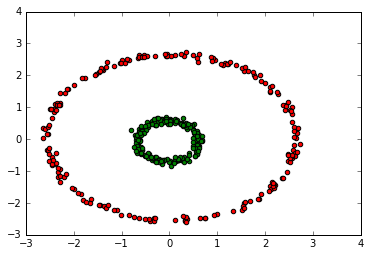

Loading: data/1457403083/alpha_0_9840000000000_H.npy


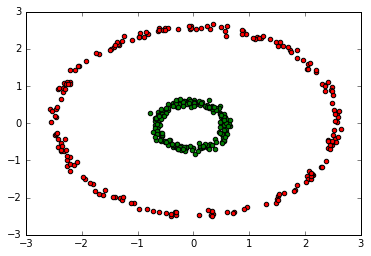

Loading: data/1457403083/alpha_0_9850000000000_H.npy


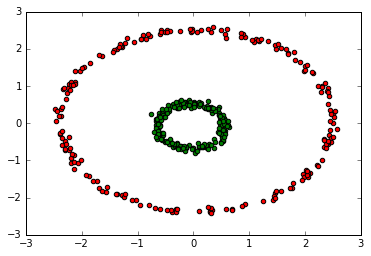

Loading: data/1457403083/alpha_0_9860000000000_H.npy


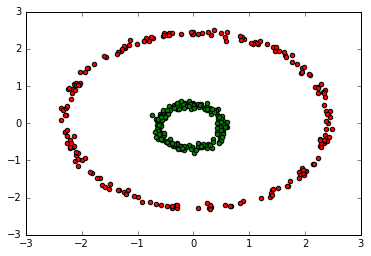

Loading: data/1457403083/alpha_0_9870000000000_H.npy


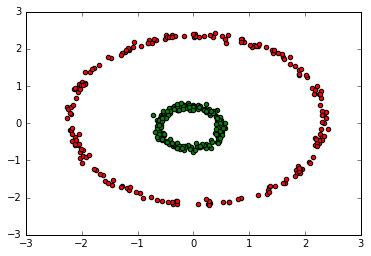

Loading: data/1457403083/alpha_0_9880000000000_H.npy


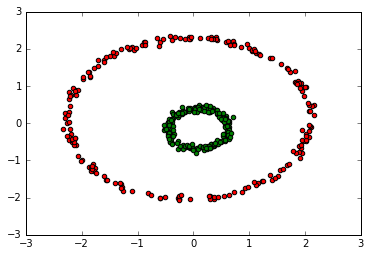

Loading: data/1457403083/alpha_0_9890000000000_H.npy


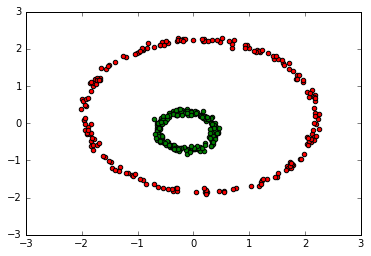

Loading: data/1457403083/alpha_0_9900000000000_H.npy


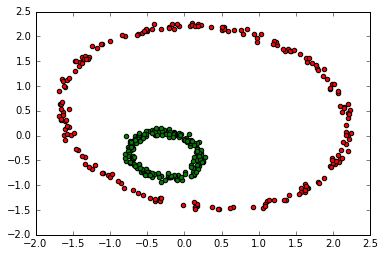

Loading: data/1457403083/alpha_0_9910000000000_H.npy


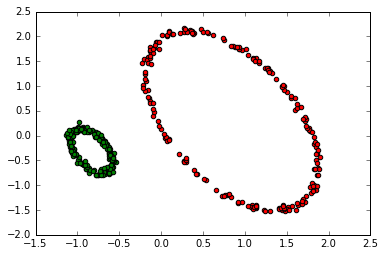

Loading: data/1457403083/alpha_0_9920000000000_H.npy


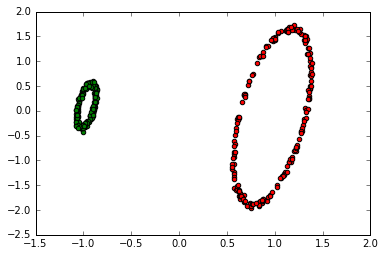

Loading: data/1457403083/alpha_0_9930000000000_H.npy


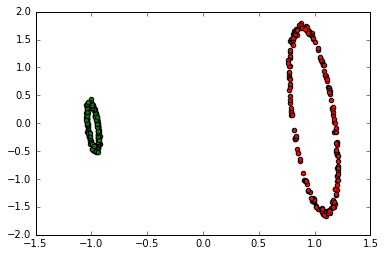

Loading: data/1457403083/alpha_0_9940000000000_H.npy


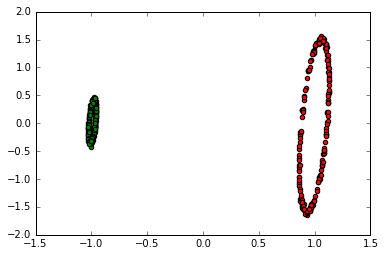

Loading: data/1457403083/alpha_0_9950000000000_H.npy


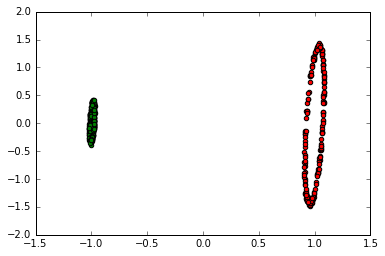

Loading: data/1457403083/alpha_0_9960000000000_H.npy


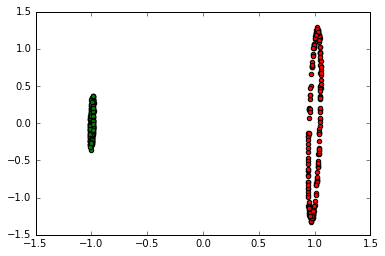

Loading: data/1457403083/alpha_0_9970000000000_H.npy


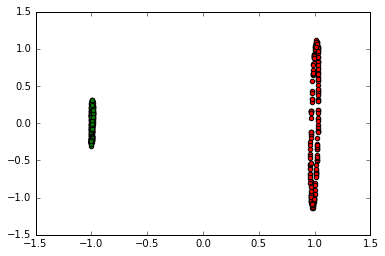

Loading: data/1457403083/alpha_0_9980000000000_H.npy


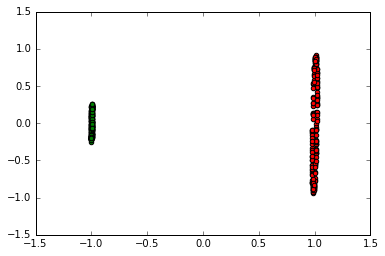

Loading: data/1457403083/alpha_0_9990000000000_H.npy


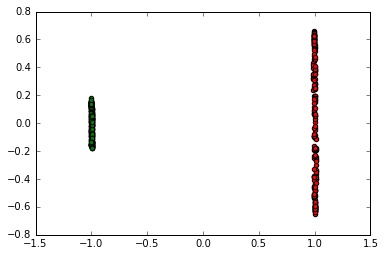

Loading: data/1457403083/alpha_1_0000000000000_H.npy


IndexError: index 1 is out of bounds for axis 0 with size 1

In [143]:
for H in load('data/1457403083/', which='H'):
    plt.scatter([x[0] for x in H[:200]], [x[1] for x in H[:200]], c='g')
    plt.scatter([x[0] for x in H[200:]], [x[1] for x in H[200:]], c='r')
    plt.show()
print(H)
# plt.scatter([x for [x,_,_] in H], [y for [_,y,_] in H], c='g')